In [1]:
import matplotlib.pyplot as matplot
import seaborn as sb
import pandas as pd
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing the dataset
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
    
# deleting the columns with unique values and rescaling
X = X[:, ~np.all(X[1:] == X[:-1], axis=0)]
X = X/255
    
# splitting the data into train, validation and test
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)
X_train, X_valid , y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size = 0.50, random_state=0)

print('--TRAIN SET --', X_train.shape, y_train.shape)
print('--VALIDATION SET--', X_valid.shape, y_valid.shape)
print('--TEST SET--', X_test.shape, y_test.shape)

--TRAIN SET -- (7000, 719) (7000,)
--VALIDATION SET-- (7000, 719) (7000,)
--TEST SET-- (56000, 719) (56000,)


In [9]:
gini_acc = []
entropy_acc = []
log_loss_acc = []

for n_est in [100, 200, 500, 1000]:
    for crit in ['gini', 'entropy', 'log_loss']:
        rf = RandomForestClassifier(n_estimators = n_est,criterion = crit)
        scores = cross_val_score(rf, X_valid, y_valid, cv = 10, n_jobs = 30, verbose  = 0)
        validation_accuracy = scores.mean()
        print(f'Number of estimators: {n_est} --- Criterion: {crit} --- CV accuracy: {validation_accuracy}')
        
        if crit == 'gini':
            gini_acc.append(validation_accuracy)
        else:
            if crit == 'entropy':
                entropy_acc.append(validation_accuracy)
            else:
                log_loss_acc.append(validation_accuracy)

Number of estimators: 100 --- Criterion: gini --- CV accuracy: 0.9431428571428571
Number of estimators: 100 --- Criterion: entropy --- CV accuracy: 0.9435714285714285
Number of estimators: 100 --- Criterion: log_loss --- CV accuracy: nan
Number of estimators: 200 --- Criterion: gini --- CV accuracy: 0.9471428571428572
Number of estimators: 200 --- Criterion: entropy --- CV accuracy: 0.9448571428571428
Number of estimators: 200 --- Criterion: log_loss --- CV accuracy: nan
Number of estimators: 500 --- Criterion: gini --- CV accuracy: 0.9451428571428572
Number of estimators: 500 --- Criterion: entropy --- CV accuracy: 0.946
Number of estimators: 500 --- Criterion: log_loss --- CV accuracy: nan
Number of estimators: 1000 --- Criterion: gini --- CV accuracy: 0.9465714285714286
Number of estimators: 1000 --- Criterion: entropy --- CV accuracy: 0.9458571428571428
Number of estimators: 1000 --- Criterion: log_loss --- CV accuracy: nan


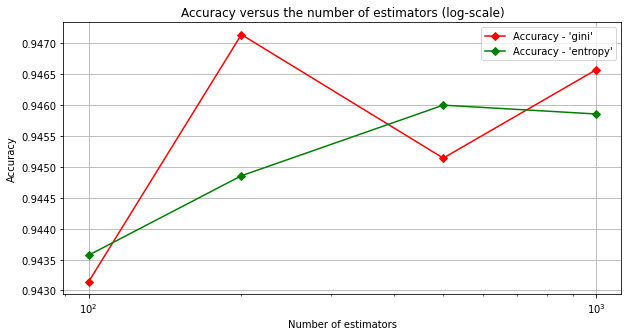

In [10]:
n_est = [100, 200, 500, 1000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(n_est, gini_acc,'-gD' ,color='red' , label="Accuracy - 'gini'")
matplot.semilogx(n_est, entropy_acc,'-gD' , label="Accuracy - 'entropy'")
# matplot.semilogx(n_est, log_loss_acc,'-gD' , label="Accuracy - 'entropy'")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Number of estimators")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the number of estimators (log-scale)')
matplot.show()

In [11]:
rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini')

start_train = time.time()
rf.fit(X_train, y_train)
time_train = time.time() - start_train

start_test = time.time()
y_pred = rf.predict(X_test)
time_test = time.time() - start_test

score = accuracy_score(y_test, y_pred)

print('Training time: ', time_train)
print('Test time: ', time_test)
print('Test accuracy = ', score)

Training time:  5.6631457805633545
Test time:  2.909393548965454
Test accuracy =  0.9452678571428571


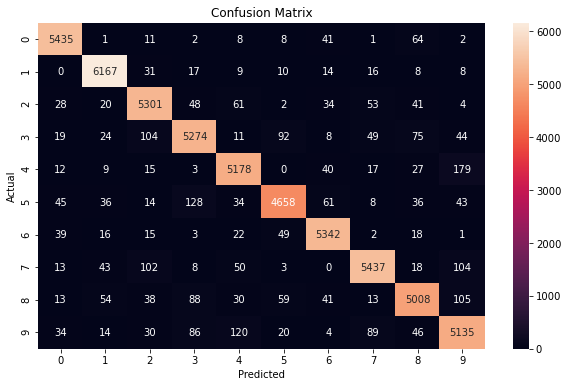

In [12]:
cm = confusion_matrix(y_test, y_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()